# G0_STP_6970
#KISHAN SINGH

Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df=pd.read_csv("loan-train.csv")

In [68]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [70]:
df.shape

(614, 13)

In [71]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [72]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [73]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [75]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [79]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [84]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df.Property_Area=le.fit_transform(df.Property_Area)

df.Property_Area.head(20)

0     2
1     0
2     2
3     2
4     2
5     2
6     2
7     1
8     2
9     1
10    2
11    2
12    2
13    0
14    2
15    2
16    2
17    2
18    0
19    2
Name: Property_Area, dtype: int32

In [85]:
df.Loan_Status=le.fit_transform(df.Loan_Status)

df.Loan_Status.head(20)


0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     0
10    1
11    1
12    1
13    0
14    1
15    1
16    1
17    0
18    0
19    1
Name: Loan_Status, dtype: int32

In [86]:
newdf=df.replace(np.NAN,{'LoanAmount':100,'Loan_Amount_Term':360.0,'Credit_History':1.0})

newdf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,No,0,Graduate,No,5849,0.0,100.0,360.0,1.0,2,1
1,LP001003,0.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,0.0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,0.0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,0.0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2,1


In [87]:
newdf.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

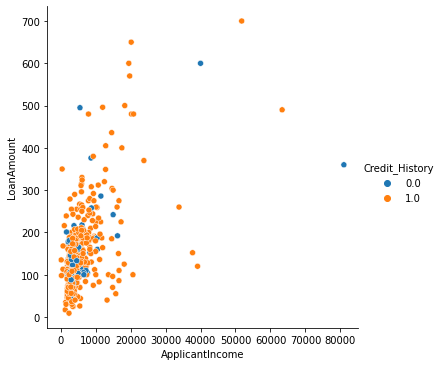

In [88]:
sns.relplot(x='ApplicantIncome',y='LoanAmount',hue="Credit_History",data=newdf)

In [89]:
x=newdf.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Loan_Status'],axis='columns')

print(x)


     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       100.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Property_Area  
0               1.0              2  
1               1.0              0  
2           

In [90]:
y=newdf['Loan_Status']

print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32


In [91]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

print(len(x_train))

print(len(x_test))

429
185


In [92]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(random_state=5)

clf.fit(x_train,y_train)


DecisionTreeClassifier(random_state=5)

In [93]:
y_pred=clf.predict(x_test)

y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1])

In [94]:
from sklearn.metrics import accuracy_score

Accuracy=accuracy_score(y_test,y_pred)

print("Accuracy is",Accuracy*100,'%')

Accuracy is 72.97297297297297 %


In [95]:
from sklearn.metrics import confusion_matrix

cm=np.array(confusion_matrix(y_test,y_pred))

cm

array([[ 35,  26],
       [ 24, 100]], dtype=int64)

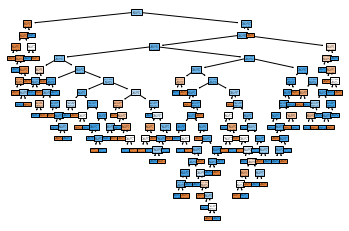

In [98]:
from sklearn import tree

tree.plot_tree(clf)


tree.plot_tree(clf,filled=True)  

plt.savefig('tree.jpg',format='jpg',bbox_inches = "tight")
